In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics

In [2]:
df= pd.read_csv('/Users/acer/Sandesh Pal/Sandesh Pal Data Science Assignment/Clustering/crime_data.csv')

In [3]:
df.head

<bound method NDFrame.head of         Unnamed: 0  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      24

In [4]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [5]:
df1= df.rename({'Unnamed: 0':'City'},axis=1)

In [6]:
df1.columns

Index(['City', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [7]:
df2 = df1.iloc[:,1:]

In [8]:
df2.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [10]:
# Normalization function
def norm_func(i):
 x = (i-i.min())/(i.max()-i.min())
 return (x)

In [11]:
# Normalized data frame (considering the numerical part of data)
X = norm_func(df2.iloc[:,:])

## K-Means Clustering
Checking via Elbow method for optimum number of clusters

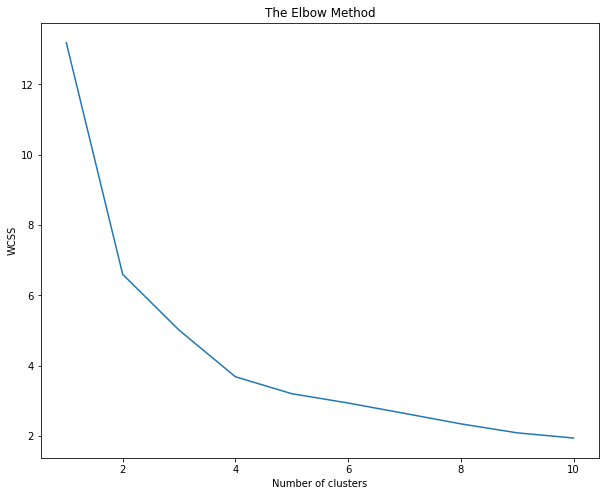

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
 kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
 kmeans.fit(X)
 wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Confirming the same with Silhouette score

In [14]:
for i in range(3,13):
 labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(X).labels_
 print ("Silhouette score for k(clusters) = "+str(i)+" is "
 +str(metrics.silhouette_score(X,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.32393600472652184
Silhouette score for k(clusters) = 4 is 0.3408903560074363
Silhouette score for k(clusters) = 5 is 0.31047828422452595
Silhouette score for k(clusters) = 6 is 0.27074591195713543
Silhouette score for k(clusters) = 7 is 0.27022032427504983
Silhouette score for k(clusters) = 8 is 0.2771980367413109
Silhouette score for k(clusters) = 9 is 0.29271198878660637
Silhouette score for k(clusters) = 10 is 0.23905346059641036
Silhouette score for k(clusters) = 11 is 0.24600415117232108
Silhouette score for k(clusters) = 12 is 0.2442092266823329


## Hence, we can conclude that optimum no of clusters = 4

In [16]:
model=KMeans(n_clusters=4)
model.fit(X)
model.labels_

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [17]:
km = pd.Series(model.labels_)
df['kclust']= km
df.iloc[:,1:5].groupby(df.kclust).mean()

,Murder,Assault,UrbanPop,Rape
kclust,,,,
0,3.600000,78.538462,52.076923,12.176923
1,10.966667,264.000000,76.500000,33.608333
2,5.852941,141.176471,73.647059,19.335294
3,13.937500,243.625000,53.750000,21.412500


Text(0.5, 0.98, 'Relative comparison of customers in respective clusters')

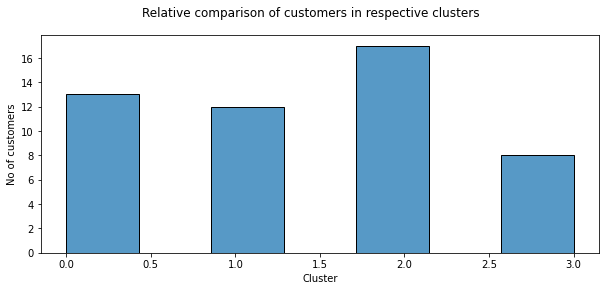

In [18]:
plt.figure(figsize=(10,4))
sns.histplot (x='kclust', data=df)
plt.xlabel('Cluster')
plt.ylabel('No of customers')
plt.suptitle('Relative comparison of customers in respective clusters')

## Hierarchical Clustering

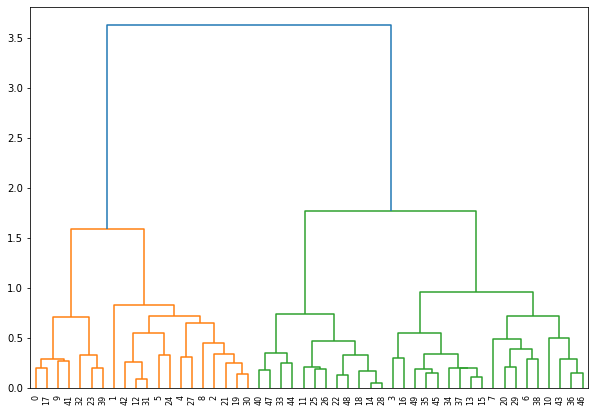

In [19]:
# create dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line. If we decide a threshold of 1.5 and cut the
dendrogram:

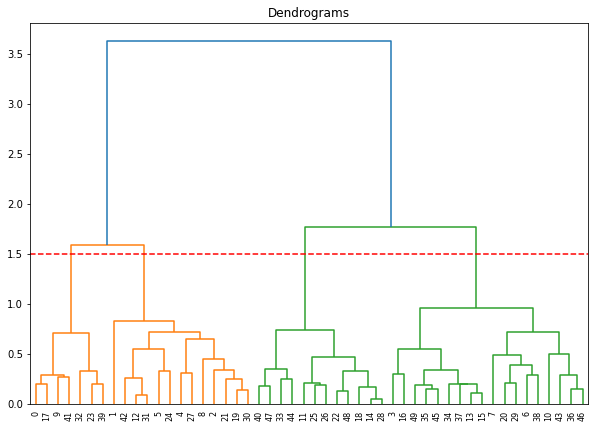

In [20]:

plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = sch.dendrogram(sch.linkage(X, method='ward'))
plt.axhline(y=1.5, color='r', linestyle='--')
plt.show()

In [21]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [22]:
y_hc = hc.fit_predict(X)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [23]:
Clusters.value_counts()

Clusters
0           47
3            1
2            1
1            1
dtype: int64

In [24]:
Clusters

,Clusters
0,0
1,3
2,0
3,0
4,0
5,0
6,0
7,1
8,2
9,0


In [25]:
df['hc_clust']= Clusters
df.iloc[:,1:7].groupby(df.hc_clust).mean()

,Murder,Assault,UrbanPop,Rape,kclust,hc_clust
hc_clust,,,,,,
0,7.619149,163.87234,65.468085,20.625532,1.404255,0
1,5.900000,238.00000,72.000000,15.800000,2.000000,1
2,15.400000,335.00000,80.000000,31.900000,1.000000,2
3,10.000000,263.00000,48.000000,44.500000,1.000000,3


Text(0.5, 0.98, 'Relative comparison of cities in respective clusters')

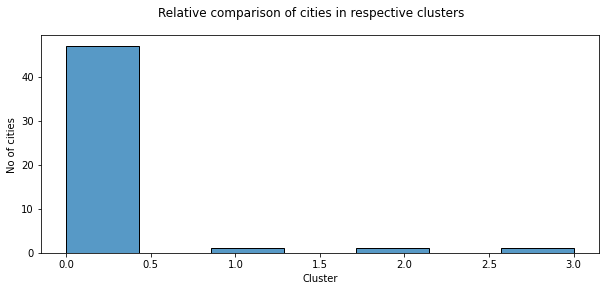

In [26]:
plt.figure(figsize=(10,4))
sns.histplot (x='hc_clust', data=df)
plt.xlabel('Cluster')
plt.ylabel('No of cities')
plt.suptitle('Relative comparison of cities in respective clusters')

<AxesSubplot:xlabel='Murder', ylabel='Assault'>

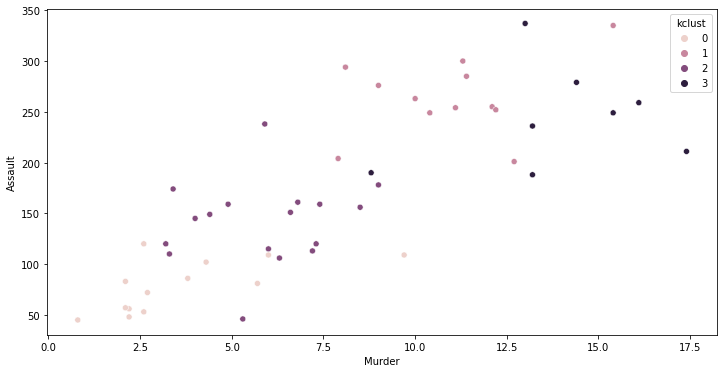

In [27]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Murder'], y =df['Assault'], hue=df['kclust'])

<AxesSubplot:xlabel='Murder', ylabel='Assault'>

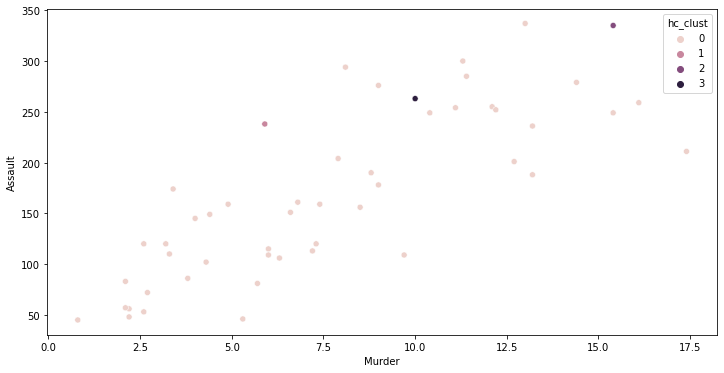

In [28]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Murder'], y =df['Assault'], hue=df['hc_clust'])